# The Lorenz equations

The Lorenz equations have a sparkling history within complex systems. They emerged from Edward Lorenz' early attempt at weather and climate modelling using a set of differential equations, which unexpectedly showed a very strange pattern that defied explanation, being "quasi-periodic" in their behaviour without settling into a stable orbit. In this notebook we compute with the Lorenz equations, generate the Lorenz attractor, the first-discovered example of a *strange attractor*, and discuss its implications

In [1]:
# numpy
import numpy

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

## The equations

The Lorenz equations are extremely simple:

\begin{align*}
    \frac{dx}{dt} &= s (y - x) \\
    \frac{dy}{dt} &= rx - y - xz \\
    \frac{dz}{dt} &= xy - bz
\end{align*}

where $x$, $y$, and $z$ are independent variables and $s$, $r$, and $b$ are parameters. The equations are non-linear: there are $xy$ and $xz$ terms. We can code the differential equations directly for a given set of parameters.

In [9]:
def make_lorenz(s, r, b):
    
    def dx(x, y, z):
        return s * (y - x)
    
    def dy(x, y, z):
        return r * x - y - x * z
    
    def dz(x, y, z):
        return x * y - b * z
    
    return dx, dy, dz

## Running the equations

To run the equations we'll first *discretise* them, taking a small time interval $\Delta t$ and assumuing that the rate of change stays constant over it. We can then create a funciton that, givenm the three differential equations, the time interval, and the initial conditions, creates time series for the three variables.

In [102]:
def run_lorenz(dx, dy, dz, dt, n, x0 = 1, y0 = 1, z0 = 1):
    # initial conditions
    x, y, z, t = x0, y0, z0, 0
    xs, ys, zs, ts = [x], [y], [z], [t]
    
    for _ in range(n):
        # determine the next state by projecting the derivative across
        # the small time interval
        nx = x + dx(x, y, z) * dt
        ny = y + dy(x, y, z) * dt
        nz = z + dz(x, y, z) * dt
        
        # record the new state in the time series
        xs.append(nx)
        ys.append(ny)
        zs.append(nz)
        ts.append(t + dt)
        
        # advance to the next state
        x, y, z, t = nx, ny, nz, t + dt
        
    return xs, ys, zs, ts

We can then run the equations for chosen parameter values.

In [43]:
dx, dy, dz = make_lorenz(10, 30, 3)
xs, ys, zs, ts = run_lorenz(dx, dy, dz, 0.01, int(500 / 0.01))

## Results

We can explore the result time series in several ways. Let's start by plotting the variables independently.

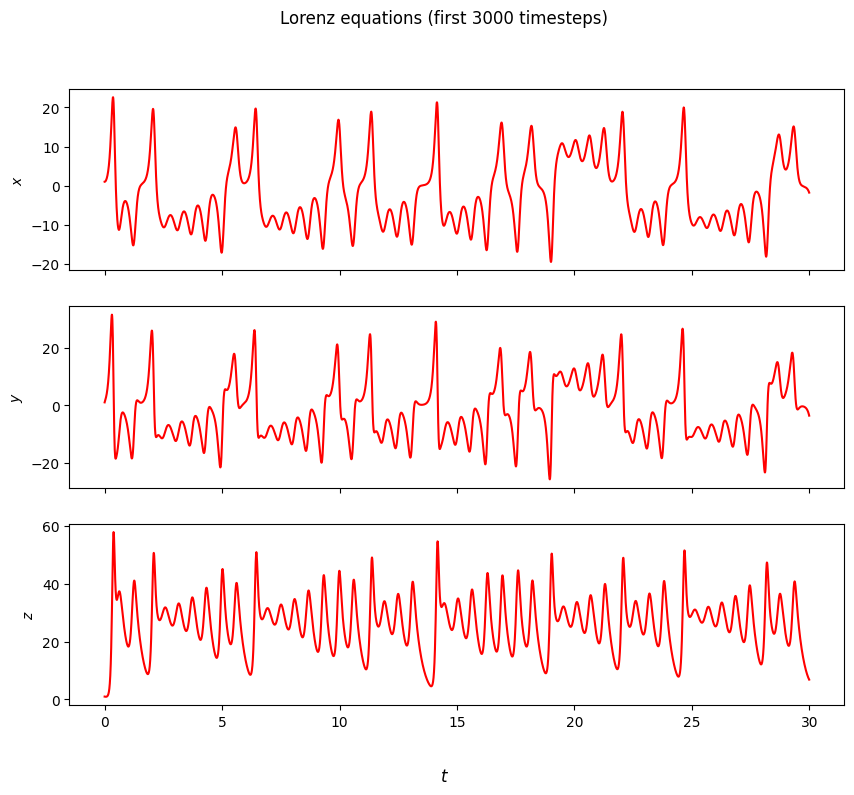

In [35]:
prefix = 3000
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

axs[0].plot(ts[:prefix], xs[:prefix], 'r-')
axs[0].set_ylabel('$x$')

axs[1].plot(ts[:prefix], ys[:prefix], 'r-')
axs[1].set_ylabel('$y$')

axs[2].plot(ts[:prefix], zs[:prefix], 'r-')
axs[2].set_ylabel('$z$')

fig.suptitle(f'Lorenz equations (first {prefix} timesteps)')
fig.supxlabel('$t$')
plt.show()

Looking at the traces for $x$ and $y$ we can see that they've very similar in shape &ndash; which is perhaps surprising, given how different their equational forms are. But trhe traces taken independently clearly aren't periodic: they *do* have structure, but they're jumping around unpredictably. The trace for $z$ is similarly aperiodic.

Things look different when we plot the phase space of the three variables.

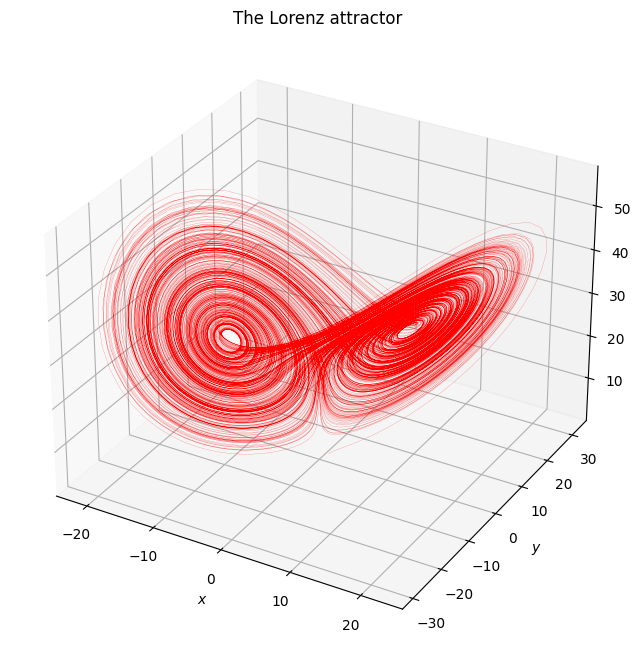

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.plot(xs, ys, zs,
       color='r', linewidth=0.1)

ax.set_title('The Lorenz attractor')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

This is the Lozenz attractor, one of the most famous diagrams in all of complex systems. It's hard to interpret, but the system orbits in each of the "wings" before switching to the other "wing" and orbiting there. It's important to notice that the curve never intersects itself: if it did then, since the phase space captures all the information about the trajectory of a point, the system would settle down into repetetive behaviour. It's this non-self-intersection that is the halmark of complex behaviour and chaos.

## Attraction

The significance of the Lozenz attractor is that any other starting point evolves to follow the attractor. We can make at attempt at visualising this by running another simulation from a different initial value.

In [91]:
xs1, ys1, zs1, ts1 = run_lorenz(dx, dy, dz, 0.01, int(500 / 0.01), 20, -30, 0)

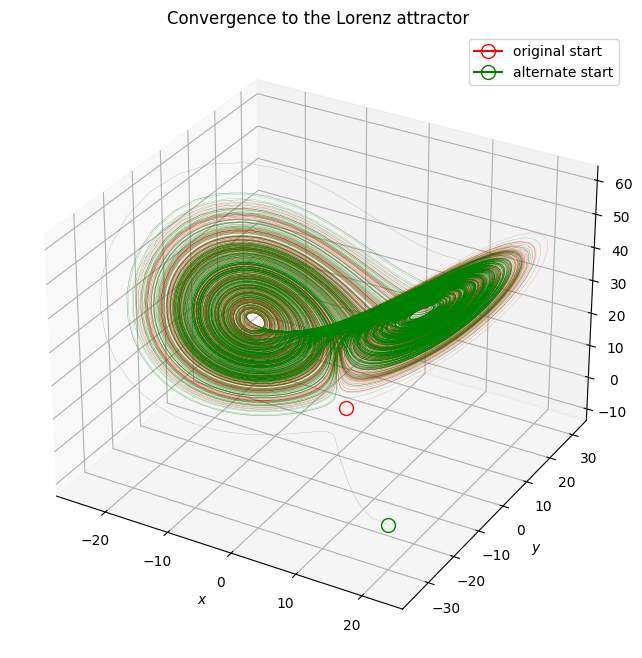

In [99]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.plot(xs, ys, zs,
       color='r', linewidth=0.1, alpha=0.75)
ax.plot([xs[0]], [ys[0]], [zs[0]], label="original start",
       color='r', marker='o', markersize=10, fillstyle='none')

ax.plot(xs1, ys1, zs1, 
       color='g', linewidth=0.1)
ax.plot([xs1[0]], [ys1[0]], [zs1[0]], label="alternate start",
       color='g', marker='o', markersize=10, fillstyle='none')
       
ax.set_title('Convergence to the Lorenz attractor')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.legend(loc='upper right')

plt.show()

The system in green starts from a different location (the green dot) than before, but rapidly moves to track the attractor without actually intersecting with it.

## Perturbation

Another feature is that points that start from "nearby" in the phase space rapidly diverge to different states. This is the sensitivity to initial conditions, or the *butterfly effect*, whereby even tiny perturbations have significant consequences.

In [78]:
deltaz = 1e-5

xs2, ys2, zs2, ts2 = run_lorenz(dx, dy, dz, 0.01, int(500 / 0.01), 10, 10 + deltaz, 0)

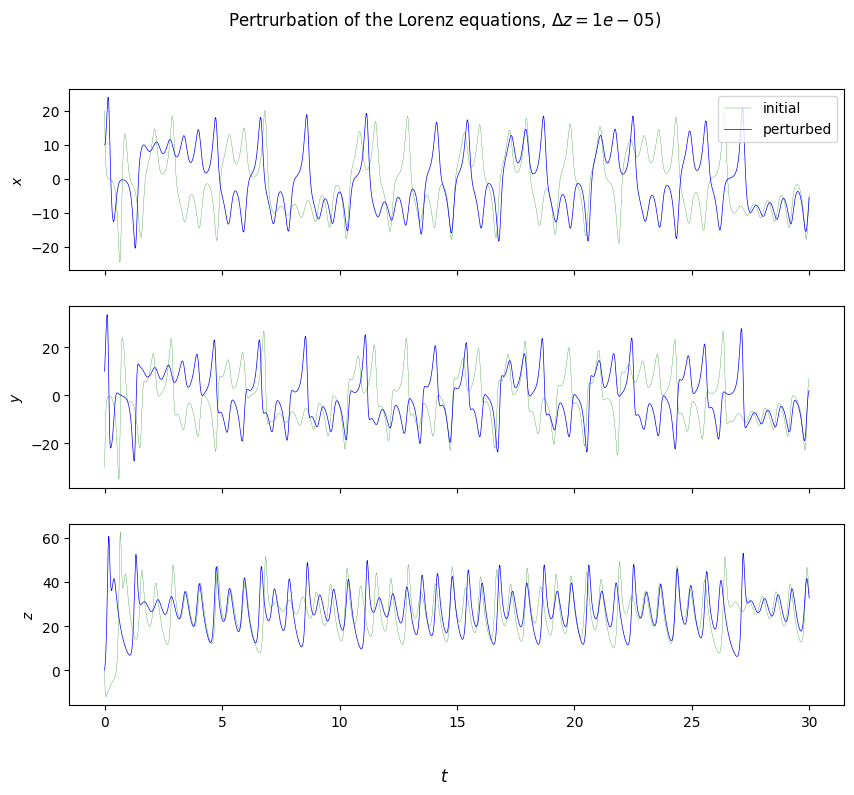

In [101]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

axs[0].plot(ts1[:prefix], xs1[:prefix], color='g', linewidth=0.2, label='initial')
axs[1].plot(ts1[:prefix], ys1[:prefix], color='g', linewidth=0.2)
axs[2].plot(ts1[:prefix], zs1[:prefix], color='g', linewidth=0.2)

axs[0].plot(ts2[:prefix], xs2[:prefix], color='b', linewidth=0.5, label='perturbed')
axs[1].plot(ts2[:prefix], ys2[:prefix], color='b', linewidth=0.5)
axs[2].plot(ts2[:prefix], zs2[:prefix], color='b', linewidth=0.5)

axs[0].set_ylabel('$x$')
axs[1].set_ylabel('$y$')
axs[2].set_ylabel('$z$')
axs[0].legend(loc='upper right')

fig.suptitle(f'Pertrurbation of the Lorenz equations, $\Delta z = {deltaz}$)')
fig.supxlabel('$t$')
plt.show()

The initial conditions for the initial (green) and perturbed (blue) traces differ in only one valriable and by a factor of 1 in 100,000 ($10^{-5}$) &ndash; but that is enough to change their trajectories completely within a very short space of time. (You can experiment with even smaller perturbations, in one or more of the variables.)

## Some implications

This has substantial practical implications. Suppose this is a system that we are measuring: the weather, in Lozenz' original formulation. We know that any measurement is only ever made to a particular precision and is always subject to noise. But a tiny change in measured conditions is sufficient to completely change the detailed evolution! This means that, for all practical purposes, we can't make long-term predictions about the evolution of a chaotic system, because the noise in the initial measurements will introduce hopeless amounts of variance in the final possibilities.

Does this mean we can't say *anything* about the behaviour of such systems? No! Chaotic systems are often extremely predictable in terms of theit "envelopes" of behaviour. We saw this above, where two different starting points nonetheless converged to the same part of the phase space, as defined by the attractor. They *didn't* &ndash; as might be expected &ndash; behaviour completely differently at the macro level, even as they *did* behave completely differently at the *micro* level. So for this system &ndash; and the same holds true for others &ndash; the structure of the phase space actuaslly tells us a lot, and lets us make surprisingly strong predictions about the long-term behaviour overall, whilst *at the same time* stopping us making detailed predictions.